In [3]:
#coding:utf-8
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = cv2.cvtColor(cv2.imread('datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [1]:
def sobel(src):
    dst = np.zeros_like(src)
    rows,cols = src.shape
    for y in range(1,rows-1):
        for x in range(1,cols-1):
            gx = src[y + 1,x - 1] + 2 * src[y + 1,x] + src[y + 1,x + 1] - \
                 src[y -1 ,x - 1] - 2 * src[y - 1,x] - src[y - 1,x + 1]
                
            gy = src[y - 1,x - 1] + 2 * src[y + 1,x - 1] + src[y + 1,x - 1] - \
                 src[y - 1,x + 1] - 2 * src[y,x + 1] - src[y + 1,x + 1]
                
            g = np.abs(gx) + np.abs(gy)
            
            if g > 255:
                g = 255
            
            dst[y,x] = g
            

    return dst
            

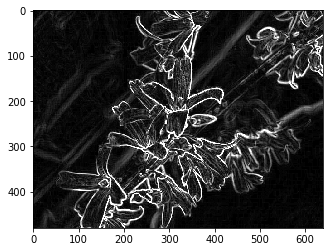

In [4]:
dst = sobel(gray)
plt.imshow(dst,cmap='gray')

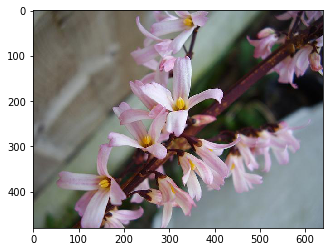

In [7]:
plt.imshow(src)

In [10]:
'''
普利维特算子(Prewitt operate)
'''
def prewitt(src):
    dst = np.zeros_like(src)
    rows,cols = src.shape
    for y in range(1,rows-1):
        for x in range(1,cols-1):
            gx = src[y + 1,x - 1] +  src[y + 1,x] + src[y + 1,x + 1] - \
                 src[y -1 ,x - 1] -  src[y - 1,x] - src[y - 1,x + 1]
                
            gy = src[y - 1,x - 1] +  src[y + 1,x - 1] + src[y + 1,x - 1] - \
                 src[y - 1,x + 1] -  src[y,x + 1] - src[y + 1,x + 1]
                
            g = np.abs(gx) + np.abs(gy)
            
            if g > 255:
                g = 255
            
            dst[y,x] = g
            

    return dst

C:\Users\jenson\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == '__main__':
C:\Users\jenson\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jenson\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in ubyte_scalars
  del sys.path[0]


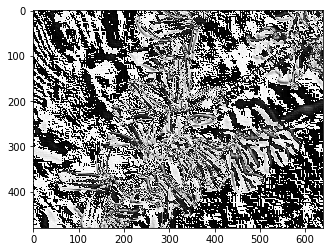

In [9]:
dst = prewitt(gray)
plt.imshow(dst,cmap='gray')

In [11]:
def roberts(src):
    dst = np.zeros_like(src)
    rows,cols = src.shape
    for y in range(rows - 1):
        for x in range(cols - 1):
            g = np.abs(src[y,x] - src[y + 1,x + 1]) + \
                np.abs(src[y,x + 1] - src[y + 1,x])
                
            if g > 255:
                g = 255
            dst[y,x] = g
            
    return dst

C:\Users\jenson\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  


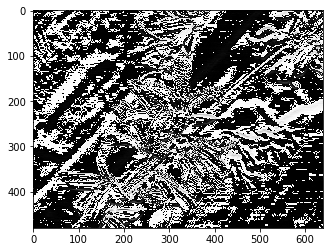

In [13]:
dst = roberts(gray)
dst = cv2.convertScaleAbs(dst)
plt.imshow(dst,cmap='gray')